In [48]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Load the Iris dataset
df = pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [50]:
# Data Cleaning and Preparation
# Display basic information about the dataset
print("Dataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [51]:
# Check for missing values
print("\nMissing values check:")
print(df.isnull().sum())


Missing values check:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [52]:
# Drop the 'Id' column as it is not a required feature for prediction
df = df.drop("Id", axis=1)
print("\nDataset after dropping Id column:")
print(df.head())



Dataset after dropping Id column:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [53]:
# Separate features (X) and target (y)
X = df.drop('Species', axis=1)
y = df['Species']

print("\nFeatures (X) head:")
print(X.head())

print("\nTarget (y) head:")
print(y.head())


Features (X) head:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2

Target (y) head:
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


In [54]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 120 samples.
Testing set has 30 samples.


In [55]:
# Train the Decision Tree classifier
print("Training the Decision Tree classifier...")
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
print("Model training complete.")

Training the Decision Tree classifier...
Model training complete.


In [56]:
# Make predictions
print("\nMaking predictions...")
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Print detailed classification report
class_names = df['Species'].unique().tolist()
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


Making predictions...

Model Evaluation:
Accuracy: 1.00

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [57]:
# Create confusion matrix
print("\nCreating confusion matrix...")
cm = confusion_matrix(y_test, y_pred)



Creating confusion matrix...


In [58]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix.png')
plt.close()
plt.show()

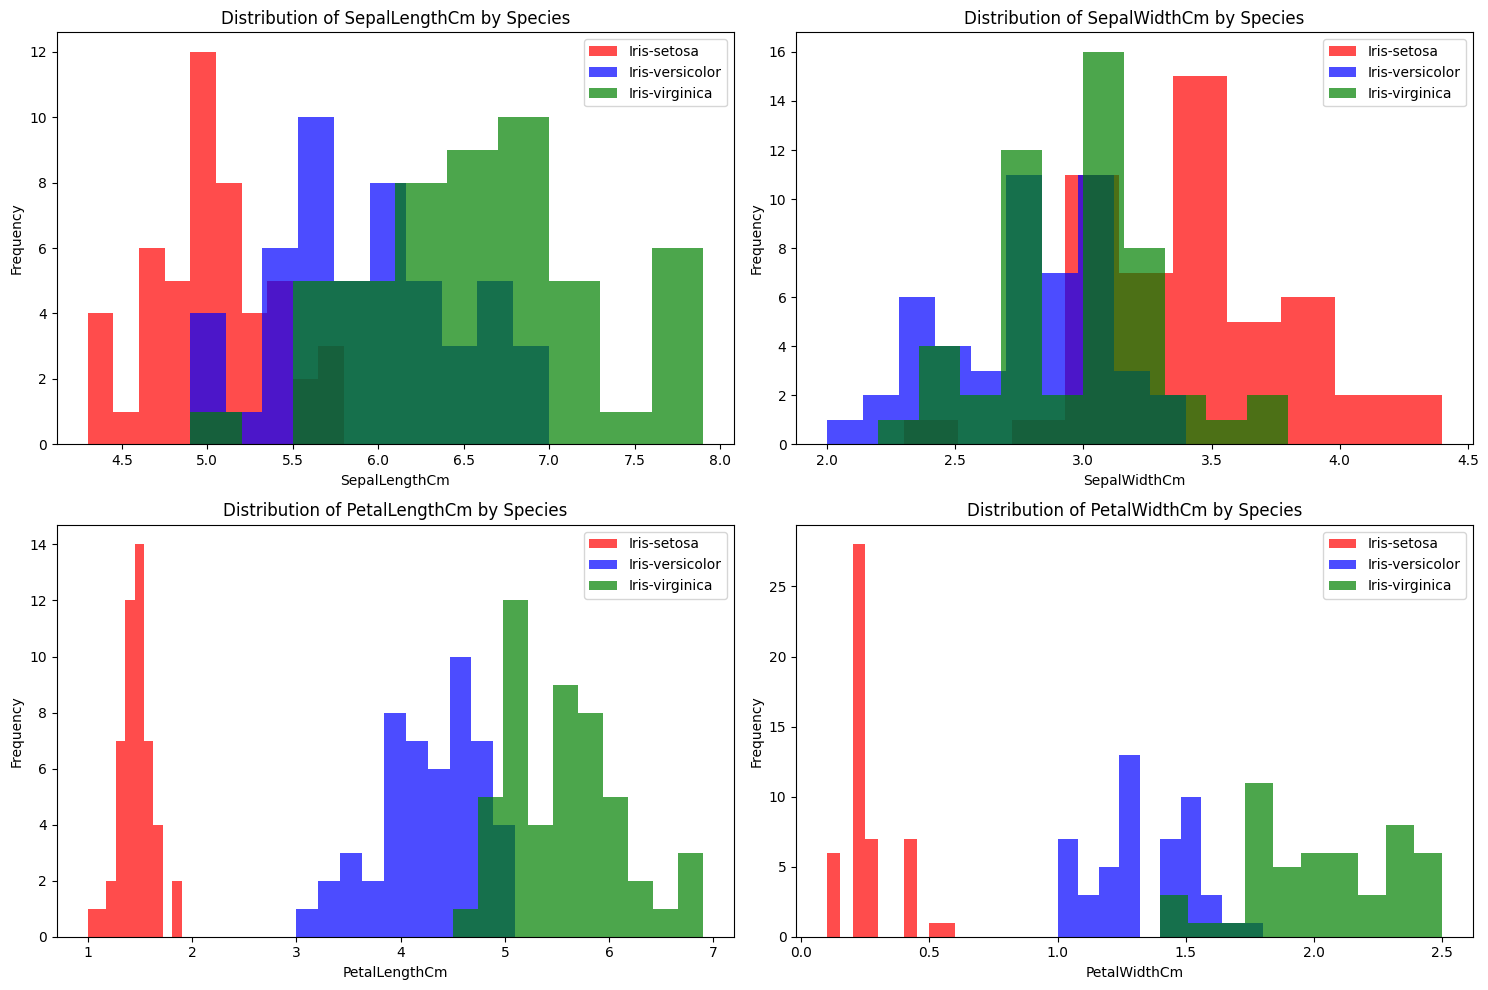

In [59]:
#Feature distributions by species
plt.figure(figsize=(15, 10))

features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
colors = ['red', 'blue', 'green']

for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    for j, species in enumerate(class_names):
        species_data = df[df['Species'] == species][feature]
        plt.hist(species_data, alpha=0.7, label=species, color=colors[j])
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature} by Species')
    plt.legend()

plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\1231\AppData\Local\Temp\ipykernel_13620\555810293.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance, palette='viridis')


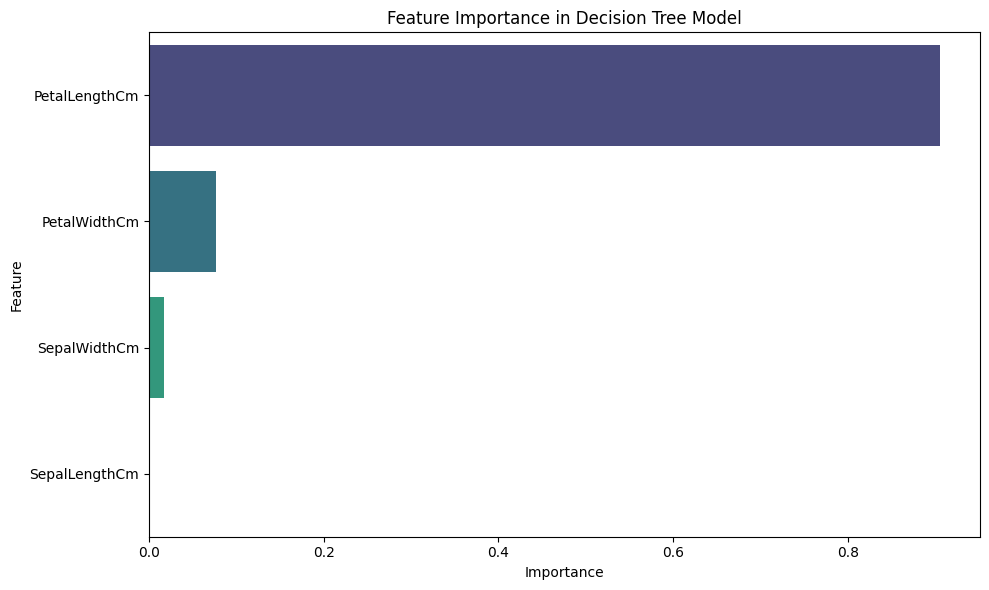

Feature Importance:
PetalLengthCm: 0.9061
PetalWidthCm: 0.0772
SepalWidthCm: 0.0167
SepalLengthCm: 0.0000


In [60]:
#  Feature importance plot
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_classifier.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance in Decision Tree Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("Feature Importance:")
for idx, row in feature_importance.iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

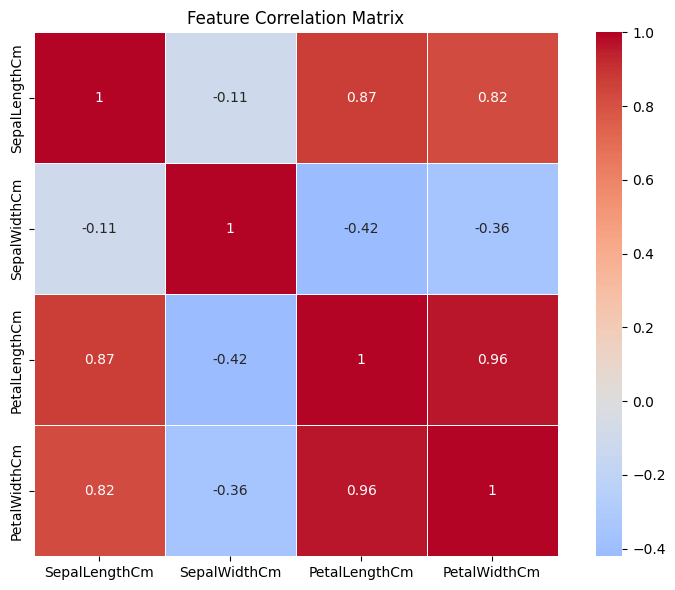

In [61]:
# 2. Correlation matrix of features
plt.figure(figsize=(8, 6))
correlation_matrix = df.drop('Species', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

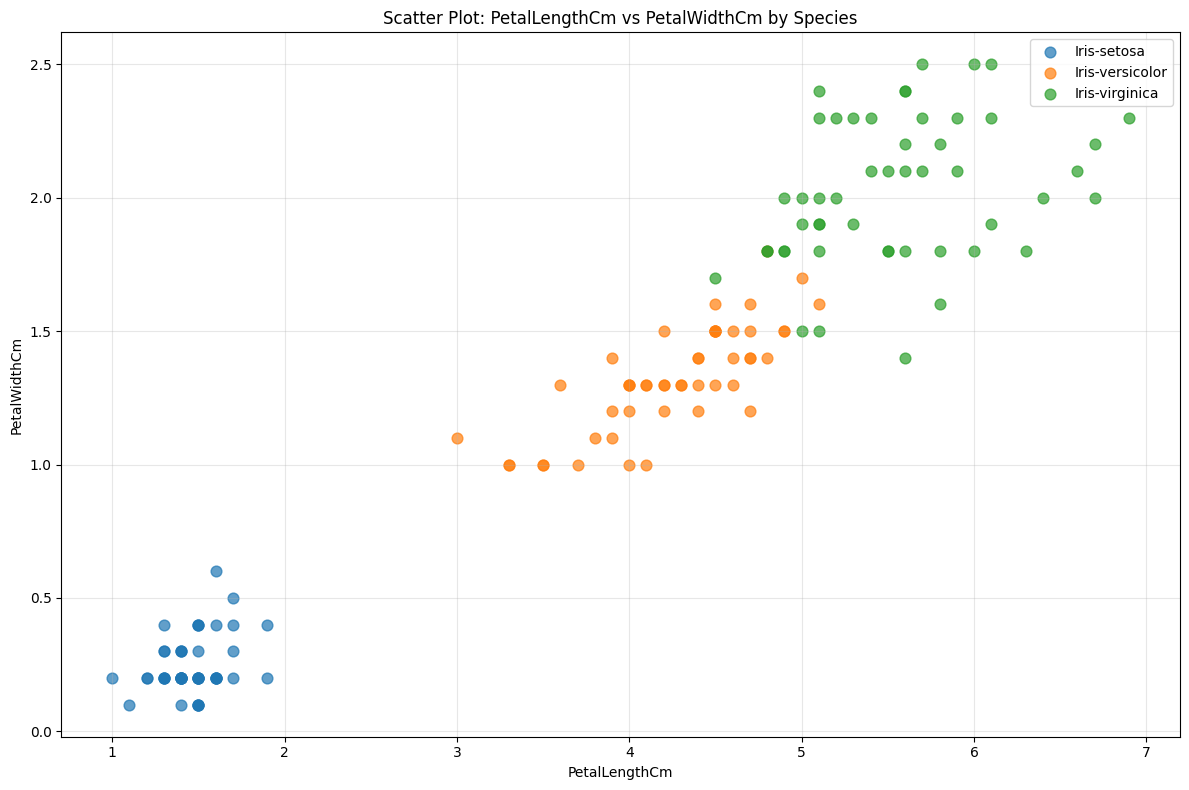

In [62]:
# Scatter plot of two most important features
plt.figure(figsize=(12, 8))

# Get the two most important features
top_features = feature_importance.head(2)['feature'].values
feature1, feature2 = top_features[0], top_features[1]

# Create scatter plot
for i, species in enumerate(class_names):
    species_data = df[df['Species'] == species]
    plt.scatter(species_data[feature1], species_data[feature2], 
                label=species, alpha=0.7, s=60)

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'Scatter Plot: {feature1} vs {feature2} by Species')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('scatter_plot.png', dpi=300, bbox_inches='tight')
plt.show()

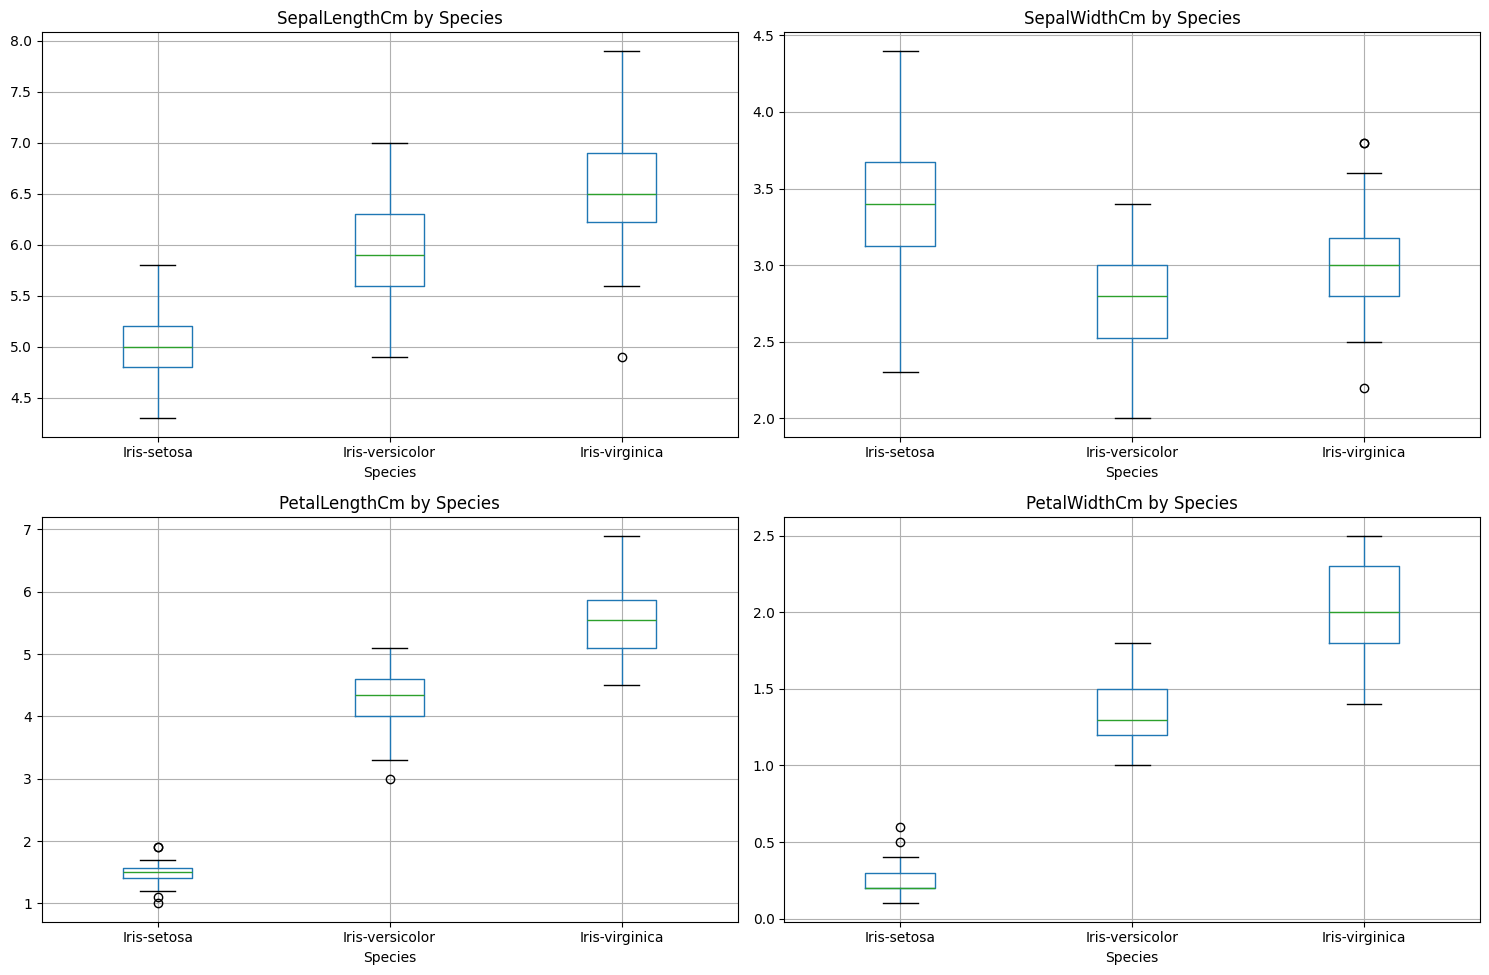

In [63]:
# Box plots for all features
plt.figure(figsize=(15, 10))

features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    df.boxplot(column=feature, by='Species', ax=plt.gca())
    plt.title(f'{feature} by Species')
    plt.suptitle('')  # Remove default suptitle

plt.tight_layout()
plt.savefig('box_plots.png', dpi=300, bbox_inches='tight')
plt.show()

In [64]:
# Summary statistics
print("=== SUMMARY STATISTICS ===")
print("\nDataset Overview:")
print(f"Total samples: {len(df)}")
print(f"Number of features: {len(df.columns)-1}")  # Excluding Species column
print(f"Number of classes: {len(class_names)}")

print("\nClass Distribution:")
print(df['Species'].value_counts())

print("\nFeature Statistics:")
print(df.describe())

print(f"\nModel Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

=== SUMMARY STATISTICS ===

Dataset Overview:
Total samples: 150
Number of features: 4
Number of classes: 3

Class Distribution:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Feature Statistics:
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

Model Performance:
Accuracy: 1.0000
Training samples: 120
Testing samples: 30
